
# Filters, Contrast, Transformation and Morphology
> You will learn to detect object shapes using edge detection filters, improve medical images with contrast enhancement and even enlarge pictures to five times its original size! You will also apply morphology to make thresholding more accurate when segmenting images and go to the next level of processing images with Python. This is the Summary of lecture "Image Processing in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Vision]
- image: images/edge_sobel.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Jump into filtering
- Filters
    - Enhancing an image
    - Emphasize or remove features
    - Smoothing
    - Sharpening
    - Edge detection


### Edge detection
In this exercise, you'll detect edges in an image by applying the Sobel filter.
![soap](dataset/soap_image.jpg)

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [3]:
soaps_image = plt.imread('./dataset/soap_image.jpg')

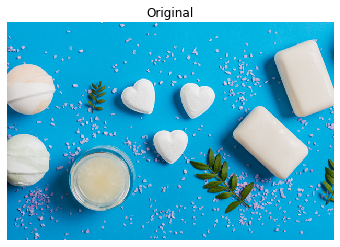

In [4]:
from skimage import color
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# apply edge detection filters
edge_sobel = sobel(soaps_image_gray)

# Show original image
show_image(soaps_image, 'Original')

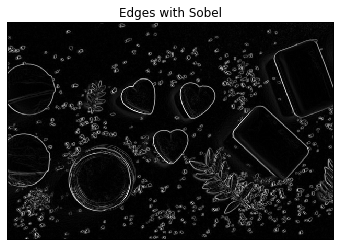

In [5]:
# show the resulting image to compare
show_image(edge_sobel, 'Edges with Sobel')

### Blurring to reduce noise
In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

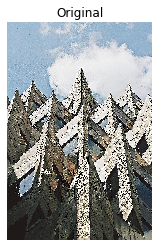

In [6]:
from skimage.filters import gaussian

building_image = plt.imread('./dataset/building_image.jpg')

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show the original image
show_image(building_image, 'Original')

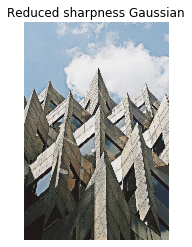

In [7]:
# Show the resulting image to compare
show_image(gaussian_image, 'Reduced sharpness Gaussian')

## Contrast enhancement
- Contrast
    - difference between the maximum and minimum pixel intensity in the image
- Enhance contrast
    - Contrast stretching
    - Histogram equalization

### Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the [National Institutes of Health Chest X-Ray Dataset](https://www.kaggle.com/nih-chest-xrays)
![chest](dataset/chest_xray_image.png)

First, you'll check the histogram of the image and then apply standard histogram equalization to improve the contrast.


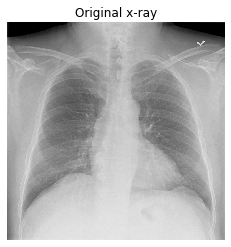

In [8]:
from skimage import exposure

chest_xray_image = plt.imread('./dataset/chest_xray_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

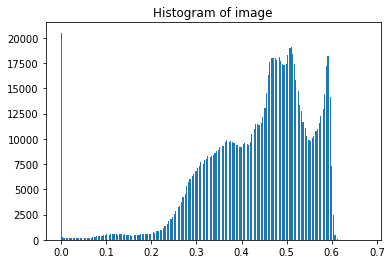

In [9]:
plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256);

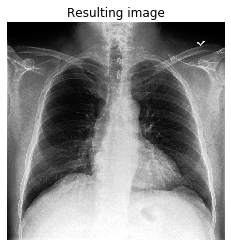

In [10]:
# Use histogram equalization to improve the contrast
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

### Aerial image
In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

![aerial](dataset/image_aerial.png)

For this we will use the normal or standard technique of Histogram Equalization.



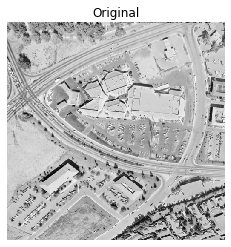

In [11]:
image_aerial = plt.imread('./dataset/image_aerial.png')

# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

# Show the original image
show_image(image_aerial, 'Original')

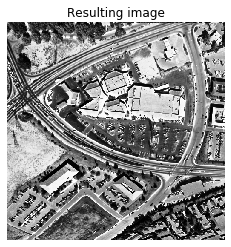

In [12]:
# Show the resulting image
show_image(image_eq, 'Resulting image')

### Let's add some impact and contrast
Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee.

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.


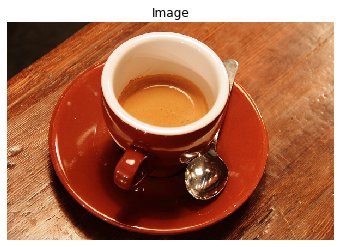

In [13]:
from skimage import data

# Load the image 
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image
show_image(original_image)

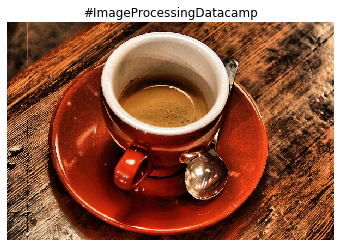

In [14]:
# Show the image to the equalized
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

You have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.

## Transformations


### Aliasing, rotating and rescaling
Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them.

![cat](dataset/image_cat.jpg)

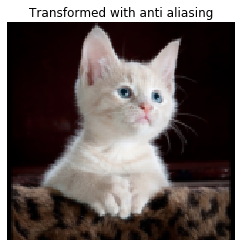

In [15]:
from skimage.transform import rotate, rescale

image_cat = plt.imread('./dataset/image_cat.jpg')

# Rotate the image 90 degress clockwise
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the anti-aliased image
show_image(rescaled_with_aa, 'Transformed with anti aliasing')

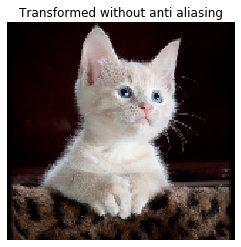

In [16]:
# Show the image without anti-aliasing
show_image(rescaled_without_aa, 'Transformed without anti aliasing')

You rotated and rescaled the image.
Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.

### Enlarging images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

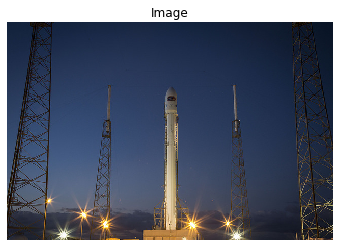

In [17]:
from skimage.transform import rescale

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show the original image
show_image(rocket_image)

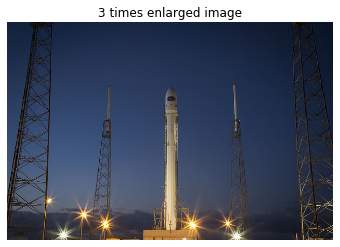

In [18]:
# Show the resulting image
show_image(enlarged_rocket_image, '3 times enlarged image')

### Proportionally resizing
We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

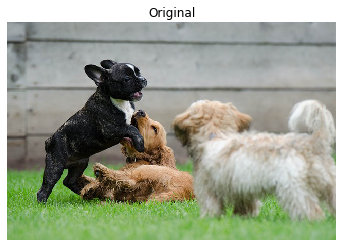

In [19]:
from skimage.transform import resize

dogs_banner = plt.imread('./dataset/dogs_banner.jpg')

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original image
show_image(dogs_banner, 'Original')

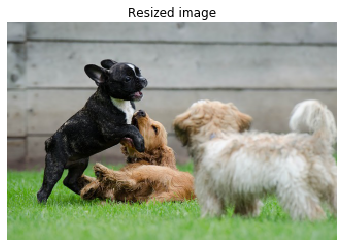

In [20]:
# Show the resulting image
show_image(image_resized, 'Resized image')

## Morphology
- Morphological operations
    - Dilation: add pixels to the boundaries of objects in an image
    - Erosioin: removes pixels on object boundaries

### Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.

![r](dataset/r5.png)

Apply the morphological operation that will discard the pixels near the letter boundaries.

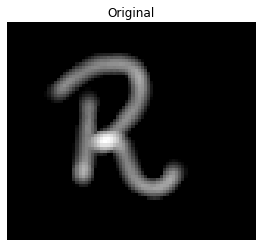

In [21]:
from skimage import morphology

upper_r_image = plt.imread('./dataset/r5.png')
upper_r_image = color.rgb2gray(upper_r_image)

# Obtain the eroded shape
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
show_image(upper_r_image, 'Original')

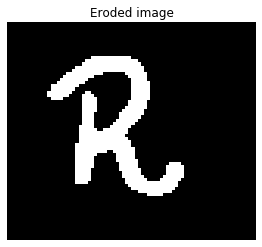

In [22]:
# See results
show_image(eroded_image_shape, 'Eroded image')

### Improving thresholded image
In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation.

This operation, in a way, expands the objects in the image.

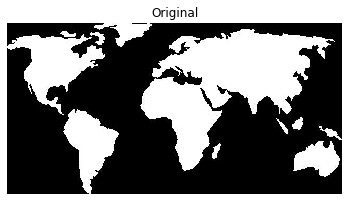

In [23]:
world_image = plt.imread('./dataset/world_image_binary.jpg')

# Obtain the dilated image
dilated_image = morphology.binary_dilation(world_image)

# See the result
show_image(world_image, 'Original')

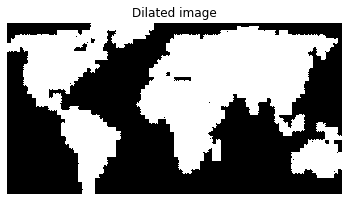

In [24]:
show_image(dilated_image, 'Dilated image')